# EJERCICIOS

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd
from keras.activations import swish

2025-01-21 16:43:14.836796: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-21 16:43:14.849780: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-21 16:43:14.865946: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-21 16:43:14.871043: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-21 16:43:14.882993: I tensorflow/core/platform/cpu_feature_guar

## EJERCICIO 1

Practica cómo entrenar una red neuronal profunda con el conjunto de datos de imágenes CIFAR10


### A
El conjunto de datos está compuesto por 60.000 imágenes en color de 32 x 32 píxe­les (50.000 para el entrenamiento, 5.000 para la validación y 5.000 para las pruebas) con 10 clases. Puedes cargarlo con tf.keras.datasets.cifar10.load_data(). Muestra una de la imagenes

In [2]:
datos = tf.keras.datasets.cifar10.load_data()

In [3]:
# Dividimos las tuplas en x e y
(x_train_full, y_train_full), (x_test_full, y_test_full) = datos

# 50,000 entrenamiento
x_train = x_train_full[:50000]
y_train = y_train_full[:50000]

# 5,000 validación
x_val = x_test_full[:5000]
y_val = y_test_full[:5000]

# 5,000 prueba
x_test = x_test_full[5000:10000]
y_test = y_test_full[5000:10000]


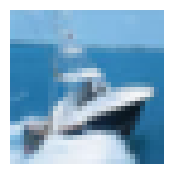

In [4]:
# muestra una imagen
plt.figure(figsize=(2, 2))
plt.imshow(x_train[8])
plt.axis('off')   # quita los ejes
plt.show()

### B
Crea una RNP con 20 capas ocultas de 100 neuronas cada una (son demasiadas,
pero esa es la gracia del ejercicio). 

Utiliza la inicialización He y la función de activa­ción Swish. 

Antes de las 20 capas tendras que añadir una capa Input y una capa Flatten y despúes una capa de de salida.

In [5]:
model = tf.keras.Sequential()      # creacion del modelo
model.add(tf.keras.layers.Input(shape=(32,32,3)))    # capa entrada,   shape= imagen de 32x32 a color 3
model.add(tf.keras.layers.Flatten())      # capa flatten
for i in range(20):        
    model.add(tf.keras.layers.Dense(100, activation=swish, kernel_initializer='he_normal'))    # las 20 capas ocultas de 100 neuronas activacion swish
model.add(tf.keras.layers.Dense(10, activation="softmax"))     # capa salida 
model.summary()

I0000 00:00:1737474199.022083   45054 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737474199.073633   45054 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737474199.073885   45054 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737474199.076122   45054 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

### C
Elige una tasa de aprendizaje adecuada para la optimización Nadam.

Para probar los diferentes modelos haz un bucle (después de cada entrenamiento evalua X_train y X_valid y guarda en un diccionario para "Red neuronal normal")

Ejemplo:


[{

    'Red neuronal normal': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X

    }
    
}] 

In [6]:
historial = {'C':{'Tasa aprendizaje': None, 'Entrenamiento accuracy': 0, 
                     'Validacion accuracy': 0, 'Tiempo': None}}
rangos = [5e-6, 1e-6, 5e-5, 1e-5, 5e-4, 1e-4, 5e-3, 1e-3, 1e-2]

for lr in rangos:
    # compilar
    model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Nadam(learning_rate=lr),  
              metrics=['accuracy'])
    # entrenar
    time_ini = time.time()
    hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
    time_fin = time.time()
    
    # guardar datos si son mejores
    val_acc = np.sort( hist.history['val_accuracy'])[-1]     # oredenado de menor a mayor cojo el ultimo
    if val_acc > historial['C']['Validacion accuracy']:
        t_acc = np.sort(hist.history['accuracy'])[-1]  
        historial['C'] = {'Tasa aprendizaje': lr, 'Entrenamiento accuracy': t_acc, 
                     'Validacion accuracy': val_acc, 'Tiempo': time_fin-time_ini}
historial

Epoch 1/10


I0000 00:00:1737474204.705527   45149 service.cc:146] XLA service 0x7f07e0002fd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737474204.705573   45149 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2025-01-21 16:43:24.881469: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-21 16:43:25.161887: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


  55/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0909 - loss: 179.1004

I0000 00:00:1737474206.656367   45149 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.1002 - loss: 42.7371 - val_accuracy: 0.1064 - val_loss: 4.2564
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1092 - loss: 3.5558 - val_accuracy: 0.1298 - val_loss: 2.5706
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1360 - loss: 2.4956 - val_accuracy: 0.1430 - val_loss: 2.3379
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1630 - loss: 2.3023 - val_accuracy: 0.1906 - val_loss: 2.2087
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1969 - loss: 2.1839 - val_accuracy: 0.2302 - val_loss: 2.1210
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2186 - loss: 2.1043 - val_accuracy: 0.2354 - val_loss: 2.0507
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2457 - loss: 2.0368 - val_accuracy: 0.2602 - val_loss: 2.0045
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2614 - loss: 1.9915 - val_accur

{'C': {'Tasa aprendizaje': 0.0001,
  'Entrenamiento accuracy': 0.4905399978160858,
  'Validacion accuracy': 0.4681999981403351,
  'Tiempo': 116.8451189994812}}

In [7]:
mejor_lr = historial['C']['Tasa aprendizaje']

### D
 Una vez elegida la tasa de aprendizaje entrena el modelo usando la detención temprana (ahora que tienes detención temprana aumenta el número de epochs).

 Añade los resultados al diccionario anterior, hay que añadir:

[{

    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X,

        'Mejor época': X

    }
    
}] 

In [8]:

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("./recursos/checkpoint/4_6_D_checkpoints.weights.h5", save_weights_only=True)

hist = model.fit(x_train, y_train, epochs=70, validation_data=(x_val, y_val), 
                     callbacks=[checkpoint_cb,early_stopping_cb])

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
            optimizer=tf.keras.optimizers.Nadam(learning_rate=mejor_lr),   # asignar tasa de aprendizaje
            metrics=['accuracy'])

time_ini = time.time()
hist = model.fit(x_train, y_train, epochs=60, validation_data=(x_val, y_val))
time_fin = time.time()

eval_train_acc = model.evaluate(x_train,y_train)[1]
eval_test_acc = model.evaluate(x_test,y_test)[1]    #  [loss, accuracy]

mejor_ep = early_stopping_cb.stopped_epoch - early_stopping_cb.patience + 1

historial['D'] = {'Tasa aprendizaje': mejor_lr, 'Entrenamiento accuracy': eval_train_acc, 
                    'Validacion accuracy': eval_test_acc, 'Tiempo': np.round(time_fin-time_ini), 'Mejor epoca': mejor_ep}

historial['D']

Epoch 1/70
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0978 - loss: 2.3040 - val_accuracy: 0.0982 - val_loss: 2.3035
Epoch 2/70
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0981 - loss: 2.3040 - val_accuracy: 0.0994 - val_loss: 2.3043
Epoch 3/70
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1023 - loss: 2.3038 - val_accuracy: 0.0982 - val_loss: 2.3034
Epoch 4/70
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0983 - loss: 2.3039 - val_accuracy: 0.1010 - val_loss: 2.3030
Epoch 5/70
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0996 - loss: 2.3038 - val_accuracy: 0.0994 - val_loss: 2.3030
Epoch 6/70
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1026 - loss: 2.3038 - val_accuracy: 0.0976 - val_loss: 2.3032
Epoch 7/70
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0979 - loss: 2.3040 - val_accuracy: 0.0976 - val_loss: 2.3033
Epoch 8/70
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1004 - loss: 2.3037 - 

{'Tasa aprendizaje': 0.0001,
 'Entrenamiento accuracy': 0.10000000149011612,
 'Validacion accuracy': 0.09759999811649323,
 'Tiempo': 138.0,
 'Mejor epoca': 4}

### E
Ahora, prueba a añadir normalización de lotes y repite C y D con esta nueva red.

In [9]:
# Limpiamos memoria
tf.keras.backend.clear_session()

# crear red
model = tf.keras.Sequential()      # creacion del modelo
model.add(tf.keras.layers.Input(shape=(32,32,3)))    # capa entrada,   shape= imagen de 32x32 a color 3
model.add(tf.keras.layers.Flatten())      # capa flatten
for i in range(20):        
    model.add(tf.keras.layers.Dense(100, kernel_initializer='he_normal'))    # las 20 capas ocultas de 100 neuronas activacion swish
    model.add(tf.keras.layers.BatchNormalization())      # normalizacion
    model.add(tf.keras.layers.Activation('swish'))
model.add(tf.keras.layers.Dense(10, activation="softmax"))     # capa salida 


def ej_CyD(model, letra):
    mejor_acc = 0
    mejor_lr = None
    # C, hayar mejor lr
    rangos = [5e-6, 1e-6, 5e-5, 1e-5, 5e-4, 1e-4, 5e-3, 1e-3, 1e-2]
    for lr in rangos:
        # compilar
        model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Nadam(learning_rate=lr),  
                metrics=['accuracy'])
        # entrenar
        time_ini = time.time()
        hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
        time_fin = time.time()
        
        # guardar mejor lr
        val_acc = np.sort( hist.history['val_accuracy'])[-1]     # oredenado de menor a mayor cojo el ultimo
        if val_acc > mejor_acc:
            mejor_lr = lr


    # D, aplicar detencion temprana con el mejor lr
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
    checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("./recursos/checkpoint/4_6_"+letra+"_checkpoints.weights.h5", save_weights_only=True)

    model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Nadam(learning_rate=mejor_lr),   # asignar tasa de aprendizaje
                metrics=['accuracy'])

    hist = model.fit(x_train, y_train, epochs=70, validation_data=(x_val, y_val), 
                        callbacks=[checkpoint_cb,early_stopping_cb])

    time_ini = time.time()
    hist = model.fit(x_train, y_train, epochs=60, validation_data=(x_val, y_val))
    time_fin = time.time()

    eval_train_acc = model.evaluate(x_train,y_train)[1]
    eval_test_acc = model.evaluate(x_test,y_test)[1]    #  [loss, accuracy]

    mejor_ep = early_stopping_cb.stopped_epoch - early_stopping_cb.patience + 1

    return {'Tasa aprendizaje': mejor_lr, 'Entrenamiento accuracy': eval_train_acc, 
            'Validacion accuracy': eval_test_acc, 'Tiempo': np.round(time_fin-time_ini), 'Mejor epoca': mejor_ep}

historial['E'] = ej_CyD(model,'E')

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.1147 - loss: 2.5153 - val_accuracy: 0.1258 - val_loss: 3.3572
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1204 - loss: 2.4608 - val_accuracy: 0.1224 - val_loss: 3.0629
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1255 - loss: 2.4271 - val_accuracy: 0.1338 - val_loss: 2.9761
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1292 - loss: 2.3982 - val_accuracy: 0.1340 - val_loss: 2.8518
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1344 - loss: 2.3678 - val_accuracy: 0.1362 - val_loss: 2.8951
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1383 - loss: 2.3393 - val_accuracy: 0.1442 - val_loss: 2.7729
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1480 - loss: 2.3214 - val_accuracy: 0.1538 - val_loss: 2.7143
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1537 - loss: 2.3003 -

### F
Prueba a sustituir la normalización de lotes por la activación SELU y haz los ajustes necesarios para garantizar que la red se autonormaliza (es decir, tienes que estandarizar los datos antes de empezar).

En este caso prueba a estandarizar manualmentes, es decir restando la media y dividiendo por la desviación standard.

Usa la inicialización LeCun normal.

Repite C y D con esta nueva red.

In [10]:
# Limpiamos memoria
tf.keras.backend.clear_session()

# estandarizar
media = np.mean(x_train, axis=(0, 1, 2))
desviacion = np.std(x_train, axis=(0, 1, 2))
x_train = (x_train - media) / desviacion
x_val = (x_val - media) / desviacion
x_test = (x_test - media) / desviacion


# crear red
model = tf.keras.Sequential()      # creacion del modelo
model.add(tf.keras.layers.Input(shape=(32,32,3)))    # capa entrada,   shape= imagen de 32x32 a color 3
model.add(tf.keras.layers.Flatten())      # capa flatten
for i in range(20):        
    model.add(tf.keras.layers.Dense(100, activation='selu', kernel_initializer=tf.keras.initializers.LecunNormal))    # las 20 capas ocultas de 100 neuronas activacion swish
model.add(tf.keras.layers.Dense(10, activation="softmax"))     # capa salida 

historial['F'] = ej_CyD(model,'F')

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1775 - loss: 2.4256 - val_accuracy: 0.3044 - val_loss: 1.9731
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3188 - loss: 1.9226 - val_accuracy: 0.3430 - val_loss: 1.8568
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3504 - loss: 1.8188 - val_accuracy: 0.3638 - val_loss: 1.7985
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3746 - loss: 1.7555 - val_accuracy: 0.3806 - val_loss: 1.7576
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3885 - loss: 1.7197 - val_accuracy: 0.3910 - val_loss: 1.7290
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4043 - loss: 1.6768 - val_accuracy: 0.3958 - val_loss: 1.7082
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4193 - loss: 1.6378 - val_accuracy: 0.4082 - val_loss: 1.6844
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4274 - loss: 1.6156 - 

### G
Prueba ahora a regularizar el modelo anterior añadiendo una capa dropout antes de la última capa (estandariza manualmente como en el punto anterior).

Repite C y D con esta nueva red.

In [11]:
# con la estandarizacion de F es suficiente, no es necesario estandarizar de nuevo

# Limpiamos memoria
tf.keras.backend.clear_session()

# crear red
model = tf.keras.Sequential()      # creacion del modelo
model.add(tf.keras.layers.Input(shape=(32,32,3)))    # capa entrada,   shape= imagen de 32x32 a color 3
model.add(tf.keras.layers.Flatten())      # capa flatten
for i in range(20):        
    model.add(tf.keras.layers.Dense(100, activation='selu', kernel_initializer=tf.keras.initializers.LecunNormal))    # las 20 capas ocultas de 100 neuronas activacion swish
model.add(tf.keras.layers.Dropout(0.2))     # capa dropout ('apaga' un porcentaje de neuronas al azar)
model.add(tf.keras.layers.Dense(10, activation="softmax"))     # capa salida 

historial['G'] = ej_CyD(model,'G')

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1682 - loss: 2.5311 - val_accuracy: 0.2924 - val_loss: 1.9956
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2800 - loss: 2.0482 - val_accuracy: 0.3330 - val_loss: 1.8824
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3172 - loss: 1.9327 - val_accuracy: 0.3636 - val_loss: 1.8199
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3367 - loss: 1.8717 - val_accuracy: 0.3786 - val_loss: 1.7738
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3550 - loss: 1.8169 - val_accuracy: 0.3860 - val_loss: 1.7474
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3757 - loss: 1.7646 - val_accuracy: 0.4004 - val_loss: 1.7165
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3911 - loss: 1.7274 - val_accuracy: 0.3982 - val_loss: 1.7015
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3954 - loss: 1.7040 - 

In [12]:
print('#####   RESULTADOS   #######')
for key,value in historial.items():
    print(key,': ',value)

#####   RESULTADOS   #######
C :  {'Tasa aprendizaje': 0.0001, 'Entrenamiento accuracy': 0.4905399978160858, 'Validacion accuracy': 0.4681999981403351, 'Tiempo': 116.8451189994812}
D :  {'Tasa aprendizaje': 0.0001, 'Entrenamiento accuracy': 0.10000000149011612, 'Validacion accuracy': 0.09759999811649323, 'Tiempo': 138.0, 'Mejor epoca': 4}
E :  {'Tasa aprendizaje': 0.01, 'Entrenamiento accuracy': 0.7660800218582153, 'Validacion accuracy': 0.49380001425743103, 'Tiempo': 244.0, 'Mejor epoca': 3}
F :  {'Tasa aprendizaje': 0.01, 'Entrenamiento accuracy': 0.10000000149011612, 'Validacion accuracy': 0.09759999811649323, 'Tiempo': 140.0, 'Mejor epoca': 12}
G :  {'Tasa aprendizaje': 0.01, 'Entrenamiento accuracy': 0.10000000149011612, 'Validacion accuracy': 0.1005999967455864, 'Tiempo': 149.0, 'Mejor epoca': 1}
